In [2]:
import numpy as np # linear algebra
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:
df = pd.read_csv('phone.csv')

In [11]:
df.shape

(1020, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1019 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [13]:
df.isnull().sum()

model          1
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.sample(5)


,model,price,rating,sim,processor,ram,battery,display,camera,card,os
763,Tecno Pova Neo 5G,"?15,499",71.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Dimensity 810 5G, Octa Core, 2.4?GHz Processor","4?GB RAM, 128?GB inbuilt",6000?mAh Battery with 18W Fast Charging,"6.8 inches, 1080?x?2400?px, 120 Hz Display wit...",50?MP Dual Rear & 8?MP Front Camera,"Memory Card Supported, upto 1?TB",Android v12
145,Samsung Galaxy F04,"?8,499",68.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio P35, Octa Core, 2.3?GHz Processor","4?GB RAM, 64?GB inbuilt",5000?mAh Battery with 15W Fast Charging,"6.5 inches, 720?x?1600?px Display with Water D...",13?MP + 2?MP Dual Rear & 5?MP Front Camera,"Memory Card Supported, upto 1?TB",Android v12
619,Xiaomi Redmi Note 11S (6GB RAM + 128GB),"?15,499",81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster","Helio G96, Octa Core, 2.05?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 33W Fast Charging,"6.43 inches, 1080?x?2400?px, 90 Hz Display wit...",108?MP Quad Rear & 16?MP Front Camera,"Memory Card Supported, upto 512?GB",Android v11
979,Xiaomi Redmi 9A (6GB RAM + 128GB),"?10,990",69.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G25, Octa Core, 2?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery,"6.53 inches, 720?x?1600?px Display with Water ...",13?MP Rear & 5?MP Front Camera,"Memory Card Supported, upto 512?GB",Android v10
121,OnePlus Nord 2T (12GB RAM + 256GB),"?33,900",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3?GHz Processor","12?GB RAM, 256?GB inbuilt",4500?mAh Battery with 80W Fast Charging,"6.43 inches, 1080?x?2400?px, 90 Hz Display wit...",50?MP + 8?MP + 2?MP Triple Rear & 32?MP Front ...,Android v12,No FM Radio


In [16]:
df["rating"].fillna(round(df["rating"].mean()),inplace=True)
df["os"].fillna(df["os"].mode(),inplace=True)
df.dropna(inplace=True)


In [17]:
df.isnull().sum().sum()


0

In [18]:
columns=df.columns
for i in columns:
    print(i,"-",df[i].nunique())


model - 1002
price - 399
rating - 30
sim - 25
processor - 289
ram - 45
battery - 244
display - 359
camera - 280
card - 61
os - 48


In [19]:
df.replace("\?","",inplace=True,regex=True)


In [20]:
battery_ram_shift=df[["battery"]][(~df["battery"].str.contains("Camera"))&(~df["battery"].str.contains("inches"))&(~df["battery"].str.contains("mAh"))]
battery_camera_shift=df[["battery"]][(~df["battery"].str.contains("RAM"))&(~df["battery"].str.contains("inches"))&(~df["battery"].str.contains("mAh"))]
battery_ram_shift.rename(columns={"battery":"ram"},inplace=True)
battery_camera_shift.rename(columns={"battery":"camera"},inplace=True)

In [21]:
camera_memory_shift=df[["camera"]][(~df["camera"].str.contains("Camera",regex=True))&(~df["camera"].str.contains("Display",regex=True))]
camera_Display_shift=df[["camera"]][(~df["camera"].str.contains("Camera",regex=True))&(~df["camera"].str.contains("Memory",regex=True))]
camera_memory_shift.rename(columns={"camera":"card"},inplace=True)
camera_Display_shift.rename(columns={"camera":"display"},inplace=True)

In [22]:
card_os_shift=df[["card"]][(~df['card'].str.contains("Memory"))&(~df['card'].str.contains("Camera"))&(~df['card'].str.contains("Display"))]
card_camera_shift=df[["card"]][(~df['card'].str.contains("Memory"))&(~df['card'].str.contains("Android"))&(~df['card'].str.contains("Bluetooth"))&(~df['card'].str.contains("OS"))&(df['card'].str.contains("Camera"))]
card_Display_shift=df[["card"]][(~df['card'].str.contains("Memory"))&(df['card'].str.contains("Display"))]
card_camera_shift.rename(columns={"card":"camera"},inplace=True)
card_Display_shift.rename(columns={"card":"display"},inplace=True)
card_os_shift.rename(columns={"card":"os"},inplace=True)

In [23]:
display_battery_shift=df[["display"]][(~df['display'].str.contains("Display"))&(df['display'].str.contains("Battery"))]
display_camera_shift=df[["display"]][(~df['display'].str.contains("Display"))&(df['display'].str.contains("Camera"))]
display_camera_shift.rename(columns={"display":"camera"},inplace=True)
display_battery_shift.rename(columns={"display":"battery"},inplace=True)

In [24]:
os_card_shift=df[["os"]][df['os'].str.contains("Memory")]
os_camera_shift=df[["os"]][df['os'].str.contains("Camera")]
os_camera_shift.rename(columns={"os":"camera"},inplace=True)
os_card_shift.rename(columns={"os":"card"},inplace=True)

In [25]:
processor_sim_shift=df[["processor"]][(df['processor'].str.contains("No"))]
processor_sim_shift.rename(columns={"processor":"sim"},inplace=True)

In [26]:
ram_battery_shift=df[['ram']][(~df['ram'].str.contains("RAM"))&(df['ram'].str.contains("Battery"))]
ram_os_shift=df[['ram']][(~df['ram'].str.contains("GB"))&(df['ram'].str.contains("T"))]
ram_display_shift=df[['ram']][(df['ram'].str.contains("Display"))]
ram_sim_shift=df[['ram']][(df['ram'].str.contains("No"))]
ram_processor_shift=df[['ram']][(df['ram'].str.contains("Core"))]

In [27]:
ram_battery_shift.rename(columns={"ram":"battery"},inplace=True)
ram_display_shift.rename(columns={"ram":"display"},inplace=True)
ram_os_shift.rename(columns={"ram":"os"},inplace=True)
ram_processor_shift.rename(columns={"ram":"proessor"},inplace=True)
ram_sim_shift.rename(columns={"ram":"sim"},inplace=True)

In [28]:
df.update(battery_camera_shift)
df.update(battery_ram_shift)
df.update(processor_sim_shift)
df.update(ram_battery_shift)
df.update(ram_display_shift)
df.update(ram_os_shift)
df.update(ram_processor_shift)
df.update(ram_sim_shift)
df.update(display_battery_shift)
df.update(display_camera_shift)
df.update(camera_Display_shift)
df.update(camera_memory_shift)
df.update(card_camera_shift)
df.update(card_Display_shift)
df.update(card_os_shift)
df.update(os_camera_shift)
df.update(os_card_shift)

In [29]:
df["battery"]=np.where(df["battery"].str.contains("mAh"),df["battery"],df["battery"].mode())
df["card"]=np.where(df["card"].str.contains("Memory"),df["card"],df["card"].mode())
df["os"]=np.where(df["os"].str.contains("Memory"),df["os"].mode(),df["os"])
df["os"]=np.where(df["os"].str.contains("Camera"),df["os"].mode(),df["os"])
df["ram"]=np.where(df["ram"].str.contains("Display"),df["ram"].mode(),df["ram"])
df["ram"]=np.where(df["ram"].str.contains("Battery"),df["ram"].mode(),df["ram"])
df["display"]=np.where(df["display"].str.contains("Display"),df["display"],df["display"].mode())
df["processor"]=np.where(df["processor"].str.contains("No"),df["processor"].mode(),df["processor"])
df["processor"]=np.where(df["processor"].str.contains("RAM"),df["processor"].mode(),df["processor"])

In [30]:
battery=df['battery'].str.split("with",expand=True).rename(columns={0:'battery_capacity', 1:'charging_capacity'})
battery['battery_capacity'].replace("mAh Battery","",inplace=True,regex=True)
battery['battery_capacity']=battery['battery_capacity'].str.strip()

In [31]:
battery['charging_capacity'].replace("W Fast Charging","",inplace=True,regex=True)
battery['charging_capacity'].replace("Fast Charging",33,inplace=True,regex=True)
battery['charging_capacity']=battery['charging_capacity'].str.strip()

In [32]:
battery['battery_capacity'].unique()

array(['5000', '3279', '4980', '4500', '3240', '4700', '4830', '4800',
       '4323', '3110', '5200', '6000', '4325', '4600', '4200', '3500',
       '3095', '4020', '3200', '4400', '4310', '4820', '3700', '5160',
       '5080', '3900', '4410', '5020', '2800', '4352', '1450', '4520',
       '4810', '4000', '2050', '2150', '4610', '5100', '7000', '4300',
       '5500', '4050', '4355', '3060', '1500', '5003', '2438', '4250',
       '3300', '4450', '4614', '4870', '4030', '4350', '4100', '21000',
       '2000', '4860', '2275', '4230', '1900', '3020', '4730', '3520',
       '4080', '2500', '5050', '5600', '4470', '3360', '3000', '2230',
       '9800', '1150', '1821', '1480', '4015', '3285', '4360', '3315',
       '1200', '3600', '3100', '22000', '2400', '1020', '4532', '1800',
       '5065', '4620', '4780', '3730', '3400', '2730', '5180', '800',
       '8000'], dtype=object)

In [33]:
battery['charging_capacity'].unique()


array(['100', '33', '15', nan, '67', '25', '120', '80', '18', '45', '10',
       '66', '44', None, '210', '30', '150', '68', '50', '20', '65',
       '180', '125', '40', '60', '200', '240', '19', '21', '135', '165',
       '22.5', '27', '55', '68.2'], dtype=object)

In [34]:
battery['charging_capacity'].fillna(33,inplace=True)


In [35]:
camera=df['camera'].str.split("&",expand=True).rename(columns={0:'Rear Camera', 1:'Front Camera'})
frontCam=camera['Front Camera'].str.split("+",expand=True).rename(columns={0:'Main Camera', 1:'Additional Camera'})
frontCam['Main Camera'].replace("Front Camera","",inplace=True,regex=True)
frontCam['Main Camera'].replace({"MP":"","Dual":"","Main":16},inplace=True,regex=True)

In [36]:
frontCam['Main Camera']=frontCam['Main Camera'].str.strip()
camera['Front Camera']=frontCam['Main Camera']
camera['Rear Camera'].replace({"Triple Rear":"","MP":""},regex=True,inplace=True)
Rear_Camera=camera['Rear Camera'].str.split("+",expand=True).rename(columns={0:'Primary Camera', 1:'Secondary Camera', 2:'Additional Camera'})

In [37]:
Rear_Camera['Primary Camera'].unique()


array(['50 ', '64 ', '108 ', '12 ', '200 ', '200 Quad Rear ', '13 ',
       '48 ', '108 Quad Rear ', '50 Quad Rear ', '13 Rear ',
       '64 Quad Rear ', '8 Rear ', '13 Dual Rear ', '48 Quad Rear ',
       '50.3 Quad Rear ', '50.3 ', '8 Dual Rear ', '12.2 ', '5 Rear ',
       '5 Rear Camera', '50 Dual Rear ', '8 ', '12 Rear ',
       '200 Penta Rear ', '2 Rear Camera', '54 ', '16 ',
       '0.3 Rear Camera', '2 Rear ', '48  ', '12 Quad Rear ', '20 ',
       '12.2 Rear ', '1.3 Rear Camera', 'No Rear Camera', '16 Rear ',
       '13 Quad Rear ', '5 ', '20 Rear ', '47.2 ', '40 Quad Rear ',
       '48 Quad Rear Camera', '24 '], dtype=object)

In [38]:
Rear_Camera['Primary Camera'].replace({"Quad Rear":"","Rear":"","Rear Camera":""},regex=True,inplace=True)
Rear_Camera['Primary Camera'].replace({"Dual":"","Camera":"","Penta":"","No":0},regex=True,inplace=True)
Rear_Camera['Primary Camera']=Rear_Camera['Primary Camera'].str.strip()

In [39]:
Rear_Camera['Secondary Camera'].unique()

array([' 48 ', ' 2 ', ' 8 ', ' 12 Dual Rear ', ' 50 Dual Rear ',
       ' 2 Dual Rear ', None, ' 12 ', ' 13 ', ' 0.3 Dual Rear ',
       ' 8 Dual Rear ', ' 10 ', ' 50 ', ' 5 ', ' Depth Sensor Dual Rear ',
       ' 2  ', ' 5 Dual Rear ', ' 16 ', ' 12.2 Dual Rear ',
       ' Depth Sensor ', ' 20 ', ' 50  ', ' 16 Dual Rear ', ' 64 ',
       ' 13 Dual Rear ', ' 0.08 Dual Rear ', ' 1.9 Dual Rear ', ' 3 ',
       ' 12.2 '], dtype=object)

In [40]:
Rear_Camera['Secondary Camera'].replace({"Dual Rear":"","Depth Sensor":"","None":"0","":"0"},regex=True,inplace=True)
Rear_Camera['Secondary Camera'].unique()

array([' 48 ', ' 2 ', ' 8 ', ' 12  ', ' 50  ', ' 2  ', None, ' 12 ',
       ' 13 ', ' 0.3  ', ' 8  ', ' 10 ', ' 50 ', ' 5 ', '   ', ' 5  ',
       ' 16 ', ' 12.2  ', '  ', ' 20 ', ' 16  ', ' 64 ', ' 13  ',
       ' 0.08  ', ' 1.9  ', ' 3 ', ' 12.2 '], dtype=object)

In [41]:
Rear_Camera['Secondary Camera']=Rear_Camera['Secondary Camera'].str.strip()


In [42]:
Rear_Camera['Additional Camera'].unique()


array([' 32  ', ' 2  ', None, ' 8  ', ' 12  ', ' 10  ', ' 50  ', ' 5  ',
       ' 0.3  ', ' 13  ', ' Ultra Wide  ', ' 48  ', ' 12  Camera',
       ' 64  ', ' 16  ', ' 12.2  ', ' Depth Sensor  '], dtype=object)

In [43]:
Rear_Camera['Additional Camera'].mode()


0     2  
Name: Additional Camera, dtype: object

In [44]:
Rear_Camera['Additional Camera'].replace({"Ultra Wide":2,"Depth Sensor":2,"Camera":""},regex=True,inplace=True)
Rear_Camera['Additional Camera']=Rear_Camera['Additional Camera'].str.strip()

In [45]:
storage=df['card'].str.split(",",expand=True).rename(columns={0:"type",1:"upto"})


In [46]:
storage['type'].value_counts()


type
Memory Card Supported        716
Memory Card (Hybrid)         157
Memory Card Not Supported    129
Name: count, dtype: int64

In [47]:
storage["upto"].unique()


array([None, ' upto 1TB', ' upto 512GB', ' upto 256GB', ' upto 2TB',
       ' upto 128GB', ' upto 32GB', ' upto 64GB', ' upto 1000GB',
       ' upto 16GB', ' upto 48GB'], dtype=object)

In [48]:
storage['upto']=np.where(storage['type'].str.contains("Memory Card Not Supported"),"1",storage['upto'])
storage['upto']=np.where((storage['type'].str.contains("Memory Card Supported")&(storage['upto'].isnull())),'512',storage['upto'])
storage["upto"].fillna('512',inplace=True)
storage["upto"].replace({"TB":"1000","GB":"","upto":""},regex=True,inplace=True)
storage["upto"]=storage["upto"].str.strip()

In [49]:
df["card"]=storage['upto']

In [50]:
display=df['display'].str.split(",",expand=True).rename(columns={0:"inches",1:"pixel",2:"display Hz"})
display["inches"].replace("inches","",inplace=True,regex=True)

In [51]:
display["inches"].unique()


array(['6.7 ', '6.59 ', '6.6 ', '6.55 ', '6.1 ', '6.67 ', '6.43 ',
       '6.72 ', '6.56 ', '6.58 ', '6.8 ', '6.51 ', '6.5 ', '6.44 ',
       '6.4 ', '6.78 ', 'Foldable Display', '6.26 ', '6.53 ', '6.73 ',
       '6.52 ', '6.14 ', '6.47 ', '6.62 ', '5 ', '6.68 ', 'Dual Display',
       '6.54 ', '4.7 ', '3.54 ', '6.9 ', '6.82 ', '6.95 ', '6.3 ',
       '6.71 ', '5.4 ', '5.42 ', '6.36 ', '6 ', '6.81 ', '5.45 ', '6.2 ',
       '6.83 ', '5.7 ', '2.4 ', '6.49 ', '5.9 ', '7.92 ', '6.18 ', '4.5 ',
       '5.5 ', '6.74 ', '2.8 ', '6.35 ', '6.66 ', '6.64 ', '6.28 ',
       '6.92 ', '1.8 ', '6.76 ', '6.57 ', '6.91 ', '6.38 ', '6.06 ', '7 ',
       '6.39 ', '6.22 ', '5.3 ', '5.84 ', '6.34 ', '6.09 ', '5.2 ',
       '6.75 ', '5.86 '], dtype=object)

In [52]:
display["inches"]=np.where(display["inches"].str.contains("Display"),display["inches"].mode(),display["inches"])
display["inches"]=display["inches"].str.strip()

In [53]:
display['pixel'].isnull().sum()


15

In [54]:
display['pixel'].mode()


0     1080x2400px
Name: pixel, dtype: object

In [55]:
display['pixel'].fillna("1080x2400px",inplace=True)


In [56]:
display['pixel'][display['pixel'].str.contains("Display")].value_counts()


pixel
 720x1600px Display with Water Drop Notch     108
 1080x2400px Display with Punch Hole           50
 1080x2408px Display with Water Drop Notch     20
 1080x2340px Display with Water Drop Notch     16
 Dual Display                                  15
                                             ... 
 640x960px Display                              1
 720x1600px Display with Small Notch            1
 750x1334px Display with Large Notch            1
 720x1600px Display with Large Notch            1
 720x1520px Display with Large Notch            1
Name: count, Length: 72, dtype: int64

In [57]:
display['pixel'].replace({"Display with Water Drop Notch":"","Display with Punch Hole":"","Display with Small Notch":""},inplace=True,regex=True)
display['pixel'].replace({"Display with Large Notch":"","Dual Display":"","Display":""},inplace=True,regex=True)
display['pixel'].replace({"px":""},inplace=True,regex=True)
display['pixel']=display['pixel'].str.strip()
display['display Hz'].isnull().sum()

396

In [58]:
display['display Hz'].value_counts()


display Hz
 120 Hz Display with Punch Hole          286
 90 Hz Display with Punch Hole           129
 90 Hz Display with Water Drop Notch      78
 144 Hz Display with Punch Hole           33
 120 Hz Display with Water Drop Notch     28
 120 Hz Display                           19
 165 Hz Display                            7
 120 Hz Display with Small Notch           5
 144 Hz Display                            5
 90 Hz Display with Small Notch            4
 90 Hz Display with Dual Punch Hole        4
 120 Hz Display with Large Notch           3
 90 Hz Display                             2
 165 Hz Display with Punch Hole            1
 144 Hz Display with Water Drop Notch      1
 240 Hz Display with Punch Hole            1
Name: count, dtype: int64

In [59]:
display['display Hz'].replace({"Display with Water Drop Notch":"","Display with Punch Hole":"","Display with Small Notch":""},inplace=True,regex=True)
display['display Hz'].replace({"Display with Large Notch":"","Dual Display":"","Display":""},inplace=True,regex=True)
display['display Hz'].replace({"Hz":"","with Dual Punch Hole":""},inplace=True,regex=True)

In [60]:
display['display Hz'].mode()


0     120  
Name: display Hz, dtype: object

In [61]:
display['display Hz'].fillna("120",inplace=True)
display['display Hz']=display['display Hz'].str.strip()

In [62]:
df['model'].value_counts()


model
OnePlus 11 5G                1
Motorola One Fusion Plus     1
Xiaomi Redmi Note 11E 5G     1
Honor Magic 4 Pro Plus 5G    1
Tecno Spark 9T               1
                            ..
OnePlus 9 Pro                1
Xiaomi Redmi Note 11S        1
Xiaomi Redmi 9 Activ         1
Tecno Camon 19 Pro 5G        1
Samsung Galaxy M52s 5G       1
Name: count, Length: 1002, dtype: int64

In [63]:
df['model']=np.where(df['model'].str.contains("OnePlus"),'OnePlus',df['model'])
df['model']=np.where(df['model'].str.contains("Honor"),'Honor',df['model'])
df['model']=np.where(df['model'].str.contains("Xiaomi"),'Xiaomi',df['model'])
df['model']=np.where(df['model'].str.contains("Oppo"),'Oppo',df['model'])
df['model']=np.where(df['model'].str.contains("LG"),'LG',df['model'])
df['model']=np.where(df['model'].str.contains("Motorola"),'Motorola',df['model'])
df['model']=np.where(df['model'].str.contains("Tecno"),'Tecno',df['model'])
df['model']=np.where(df['model'].str.contains("Samsung"),'Samsung',df['model'])
df['model']=np.where(df['model'].str.contains("POCO"),'POCO',df['model'])
df['model']=np.where(df['model'].str.contains("Vivo"),'Vivo',df['model'])
df['model']=np.where(df['model'].str.contains("Poco"),'POCO',df['model'])
df['model']=np.where(df['model'].str.contains("Apple"),'Apple',df['model'])
df['model']=np.where(df['model'].str.contains("Nothing"),'Nothing',df['model'])
df['model']=np.where(df['model'].str.contains("Realme"),'Realme',df['model'])
df['model']=np.where(df['model'].str.contains("OPPO"),'Oppo',df['model'])
df['model']=np.where(df['model'].str.contains("POCO"),'POCO',df['model'])
df['model']=np.where(df['model'].str.contains("iQOO"),'iQOO',df['model'])
df['model']=np.where(df['model'].str.contains("Gionee"),'Gionee',df['model'])
df['model']=np.where(df['model'].str.contains("Nokia"),'Nokia',df['model'])
df['model']=np.where(df['model'].str.contains("Google"),'Google',df['model'])
df['model']=np.where(df['model'].str.contains("Huawei"),'Huawei',df['model'])
df['model']=np.where(df['model'].str.contains("Lenovo"),'Lenovo',df['model'])
df['model']=np.where(df['model'].str.contains("Infinix"),'Infinix',df['model'])
df['model']=np.where(df['model'].str.contains("Sony"),'Sony',df['model'])
df['model']=np.where(df['model'].str.contains("Lava"),'Lava',df['model'])
df['model']=np.where(df['model'].str.contains("Micromax"),'Micromax',df['model'])
df['model']=np.where(df['model'].str.contains("Asus"),'Asus',df['model'])
df['model']=np.where(df['model'].str.contains("Doogee"),'Doogee',df['model'])
df['model']=np.where(df['model'].str.contains("Nubia"),'Nubia',df['model'])
df['model']=np.where(df['model'].str.contains("Redmi"),'Redmi',df['model'])
df['model']=np.where(df['model'].str.contains("Jio"),'Jio',df['model'])
df['model']=np.where(df['model'].str.contains("itel"),'itel',df['model'])
df['model']=np.where(df['model'].str.contains("iKall"),'iKall',df['model'])
df['model']=np.where(df['model'].str.contains("Lyf"),'Lyf',df['model'])
df['model']=np.where(df['model'].str.contains("Itel"),'itel',df['model'])
df['model']=np.where(df['model'].str.contains("ZTE"),'ZTE',df['model'])
df['model']=np.where(df['model'].str.contains("Letv"),'Letv',df['model'])

In [64]:
df["model"].unique()


array(['OnePlus', 'Samsung', 'Motorola', 'Realme', 'Apple', 'Xiaomi',
       'Nothing', 'Oppo', 'Vivo', 'POCO', 'iQOO', 'Jio', 'Gionee',
       'Tecno', 'Tesla Pi Phone', 'Google', 'Infinix', 'Nokia',
       'Cola Phone', 'Letv', 'iKall', 'LeEco S1 Pro', 'Duoqin F22 Pro',
       'Lava', 'Honor', 'Nubia', 'Redmi', 'Asus', 'itel',
       'Royole FlexPai 2', 'Sony', 'Vertu Signature Touch', 'BLU F91 5G',
       'Lyf', 'Huawei', 'ZTE', 'Lenovo', 'LG', 'Eunity U1 5605N',
       'Micromax', 'Leitz Phone 2', 'CAT S22 Flip', 'DIZO Star 500',
       'BlackZone Ultra 4G', 'Doogee', 'Royole FlexPai 3 5G', 'TCL Ion X',
       'Sharp Aquos R5G', 'Blackview BV5200 Pro', 'XTouch F40 Flip'],
      dtype=object)

In [65]:
df['os'].unique()


array(['Android v13', 'Android v12', 'iOS v16', 'iOS v15', 'Android v11',
       'Android v10', 'iOS v13', 'HarmonyOS v2', 'iOS v15.0', 'iOS v14',
       'Android v10.0', 'Android v8.1 (Oreo)', 'iOS v13.0',
       'Android v11.0', 'Android v9.0 (Pie)', 'Android v12.1',
       'iOS v12.3', 'Unisoc T107', 'KAI OS', 'iOS v17',
       'Android v4.4.2 (KitKat)', 'Android v5.1 (Lollipop)',
       'Android v5.1.1 (Lollipop)', 'Hongmeng OS v3.0', 'Bluetooth',
       'Android v8.0 (Oreo)', 'T117', 'Android v6.0 (Marshmallow)',
       'Pragati OS (Powered by Android)', 'iOS v10', 'RTOS (Series 30+)',
       'iOS v14.0', 'Harmony v2.0', 'Nucleus', 'Hongmeng OS v4.0',
       'HarmonyOS v2.0', 'EMUI v12', 'HarmonyOS', 'Android v7.1 (Nougat)',
       'Android', 'Android v9 (Pie)'], dtype=object)

In [66]:
df['os']=np.where(df['os'].str.contains("Android"),'Android',df['os'])
df['os']=np.where(df['os'].str.contains("iOS"),'iOS',df['os'])
df['os']=np.where(df['os'].str.contains("HarmonyOS"),'Harmony',df['os'])
df['os']=np.where(df['os'].str.contains("Hongmeng"),'Hongmeng',df['os'])
df['os']=np.where(df['os'].str.contains("Harmony"),'Harmony',df['os'])

In [67]:
df['price'].replace(",","",regex=True,inplace=True)


In [68]:
ram=df["ram"].str.split(",",expand=True).rename(columns={0:"RAM",1:"inbuilt"})
ram['RAM'].unique()


array(['12GB RAM', '6GB RAM', '4GB RAM', '8GB RAM', '3GB RAM', '16GB RAM',
       '2GB RAM', '512MB RAM', '18GB RAM', '48MB RAM', '1GB RAM',
       '64GB inbuilt', '512GB inbuilt', '64MB RAM', '32MB RAM', '8MB RAM',
       '4MB inbuilt'], dtype=object)

In [69]:
ram['inbuilt'].unique()

array([' 256GB inbuilt', ' 128GB inbuilt', ' 64GB inbuilt',
       ' 32GB inbuilt', ' 512GB inbuilt', ' 512MB inbuilt',
       ' 4GB inbuilt', ' 1TB inbuilt', ' 128MB inbuilt', ' 16GB inbuilt',
       None, ' 8GB inbuilt', ' 32MB inbuilt', ' 16MB inbuilt',
       ' 48MB inbuilt'], dtype=object)

In [70]:
ram['inbuilt'].isnull().sum()

4

In [71]:
ram['inbuilt']=np.where(ram['RAM'].str.contains("inbuilt"),ram['RAM'],ram['inbuilt'])

In [72]:
ram['RAM'].mode()


0    8GB RAM
Name: RAM, dtype: object

In [73]:
ram['RAM']=np.where(ram['RAM'].str.contains("inbuilt"),"8GB RAM",ram['RAM'])
ram['RAM']=np.where(ram['RAM'].str.contains("MB"),"1GB",ram['RAM'])
ram['RAM'].replace({"RAM":"","MB":"","GB":""},regex=True,inplace=True)
ram['inbuilt']=np.where(ram['inbuilt'].str.contains("MB"),"1GB",ram['inbuilt'])
ram['inbuilt'].replace({"inbuilt":"","TB":"1000","GB":""},regex=True,inplace=True)

In [74]:
ram['inbuilt']=ram['inbuilt'].str.strip()
ram['RAM']=ram['RAM'].str.strip()

In [75]:
df.drop(columns="sim",inplace=True)


In [76]:
processor=df["processor"].str.split(",",expand=True).rename(columns={0:"type",1:"core",2:"processor Hz"})
processor['type'].value_counts()

type
Dimensity 700 5G      39
Helio P35             28
Snapdragon 8+ Gen1    26
Snapdragon 8 Gen2     23
Snapdragon 695        23
                      ..
Tiger T606             1
Snapdragon 615         1
Helio MT6580           1
Helio  G95             1
Google  Tensor 3       1
Name: count, Length: 255, dtype: int64

In [77]:
processor['type']=np.where(processor['type'].str.contains("Dimensity"),"Dimensity",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Snapdragon"),"Snapdragon",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Helio"),"Helio",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Tiger"),"Tiger",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Unisoc"),"Unisoc",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Sanpdragon"),"Snapdragon",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Bionic"),"Bionic",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Google"),"Google",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Apple"),"Apple",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Exynos"),"Exynos",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Fusion"),"Fusion",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Spreadtrum"),"Spreadtrum",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Kirin"),"Kirin",processor['type'])

In [78]:
processor['core'].isnull().sum()

20

In [79]:
processor['type'][processor['type'].str.contains("Core")].shape


(22,)

In [80]:
processor['core']=np.where(processor['type'].str.contains("Core"),processor['type'],processor['core'])
processor['core'].mode()

0     Octa Core
Name: core, dtype: object

In [81]:
processor['core'].fillna("Octa Core",inplace=True)


In [82]:
processor['type']=np.where(processor['type'].str.contains("Core"),"Snapdragon",processor['type'])
processor['core'].replace({"Core":"","Processor":""},inplace=True,regex=True)
processor['core']=processor['core'].str.strip()

In [83]:
processor['processor Hz'].isnull().sum()

61

In [84]:
processor['processor Hz'].mode()

0     2.2GHz Processor
Name: processor Hz, dtype: object

In [85]:
processor['processor Hz'].fillna("2.2GHz Processor",inplace=True)
processor['processor Hz'].value_counts()

processor Hz
 2.2GHz Processor     144
 2GHz Processor       143
 2.4GHz Processor     128
 3.2GHz Processor      94
 2.3GHz Processor      86
2.2GHz Processor       61
 3GHz Processor        53
 2.84GHz Processor     36
 2.05GHz Processor     28
 2.5GHz Processor      23
 1.8GHz Processor      22
 2.85GHz Processor     19
 3.22GHz Processor     18
 1.6GHz Processor      18
 3.1GHz Processor      15
 2.6GHz Processor      14
 2.9GHz Processor      13
 1.82GHz Processor     10
 2.73GHz Processor      9
 2.8GHz Processor       9
 3.05GHz Processor      8
 1.3GHz Processor       8
 2.36GHz Processor      8
 2.65GHz Processor      5
 2.7GHz Processor       5
 1.5GHz Processor       4
 1.4GHz Processor       4
 1.1GHz Processor       3
 2.96GHz Processor      3
 2.86GHz Processor      3
 3.13GHz Processor      2
 2.35GHz Processor      1
 2.37GHz Processor      1
 1.99GHz Processor      1
 1.95GHz Processor      1
 2.1GHz Processor       1
 1.2GHz Processor       1
Name: count, dtype: int64

In [86]:
processor['processor Hz'].replace({"GHz Processor":""},regex=True,inplace=True)
processor['processor Hz']=processor['processor Hz'].str.strip()

In [87]:
Rear_Camera['Additional Camera'].mode()

0    2
Name: Additional Camera, dtype: object

In [88]:
Rear_Camera['Primary Camera'].mode()


0    50
Name: Primary Camera, dtype: object

In [89]:
Rear_Camera['Secondary Camera'].mode()


0    2
Name: Secondary Camera, dtype: object

In [90]:
Rear_Camera['Additional Camera'].fillna(2,inplace=True)
Rear_Camera['Primary Camera'].fillna(50,inplace=True)
Rear_Camera['Secondary Camera'].fillna(2,inplace=True)

In [91]:
frontCam["Main Camera"].isnull().sum()

24

In [92]:
frontCam["Main Camera"].mode()


0    16
Name: Main Camera, dtype: object

In [93]:
frontCam.drop(columns="Additional Camera",inplace=True)
frontCam['Main Camera'].fillna(16,inplace=True)

In [94]:
df=pd.concat([df,battery],axis=1)
df=pd.concat([df,Rear_Camera],axis=1)
df=pd.concat([df,frontCam],axis=1)
df=pd.concat([df,display],axis=1)
df=pd.concat([df,processor],axis=1)
df=pd.concat([df,ram],axis=1)

In [95]:
df.drop(columns=["processor","ram","battery","display","camera"],inplace=True)


In [96]:
df.columns

Index(['model', 'price', 'rating', 'card', 'os', 'battery_capacity',
       'charging_capacity', 'Primary Camera', 'Secondary Camera',
       'Additional Camera', 'Main Camera', 'inches', 'pixel', 'display Hz',
       'type', 'core', 'processor Hz', 'RAM', 'inbuilt'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 0 to 1019
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              1002 non-null   object 
 1   price              1002 non-null   object 
 2   rating             1002 non-null   float64
 3   card               1002 non-null   object 
 4   os                 1002 non-null   object 
 5   battery_capacity   1002 non-null   object 
 6   charging_capacity  1002 non-null   object 
 7   Primary Camera     1002 non-null   object 
 8   Secondary Camera   1002 non-null   object 
 9   Additional Camera  1002 non-null   object 
 10  Main Camera        1002 non-null   object 
 11  inches             1002 non-null   object 
 12  pixel              1002 non-null   object 
 13  display Hz         1002 non-null   object 
 14  type               1002 non-null   object 
 15  core               1002 non-null   object 
 16  processor Hz       1002 non-n

In [98]:
df["Additional Camera"]=df["Additional Camera"].astype(float)
df["Main Camera"]=df["Main Camera"].astype(float)
df['Primary Camera']=df['Primary Camera'].astype(float)
df['RAM']=df['RAM'].astype(int)
df['Secondary Camera'].replace("","1",inplace=True)
df['Secondary Camera']=df['Secondary Camera'].astype(float)
df['battery_capacity']=df['battery_capacity'].astype(int)
df['card']=df['card'].astype(int)
df['charging_capacity']=df['charging_capacity'].astype(float)
df['display Hz']=df['display Hz'].astype(int)
df['inbuilt']=df['inbuilt'].astype(int)
df['inches']=df['inches'].astype(float)
df['price']=df['price'].astype(int)
df['processor Hz']=df['processor Hz'].astype(float)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 0 to 1019
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              1002 non-null   object 
 1   price              1002 non-null   int32  
 2   rating             1002 non-null   float64
 3   card               1002 non-null   int32  
 4   os                 1002 non-null   object 
 5   battery_capacity   1002 non-null   int32  
 6   charging_capacity  1002 non-null   float64
 7   Primary Camera     1002 non-null   float64
 8   Secondary Camera   1002 non-null   float64
 9   Additional Camera  1002 non-null   float64
 10  Main Camera        1002 non-null   float64
 11  inches             1002 non-null   float64
 12  pixel              1002 non-null   object 
 13  display Hz         1002 non-null   int32  
 14  type               1002 non-null   object 
 15  core               1002 non-null   object 
 16  processor Hz       1002 non-n

In [101]:
df_copy=df.copy()

In [102]:
catcols=df.select_dtypes(include='O')


In [103]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[catcols.columns]=oe.fit_transform(catcols)

In [104]:
X = df.drop(columns=['price',"pixel"])
y = df['price']

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=500)

In [106]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()

In [107]:
model_1.fit(X_train,y_train)
model_1.score(X_train,y_train)
y_pred = model_1.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6344503343119892
MAE 13441.016630991377


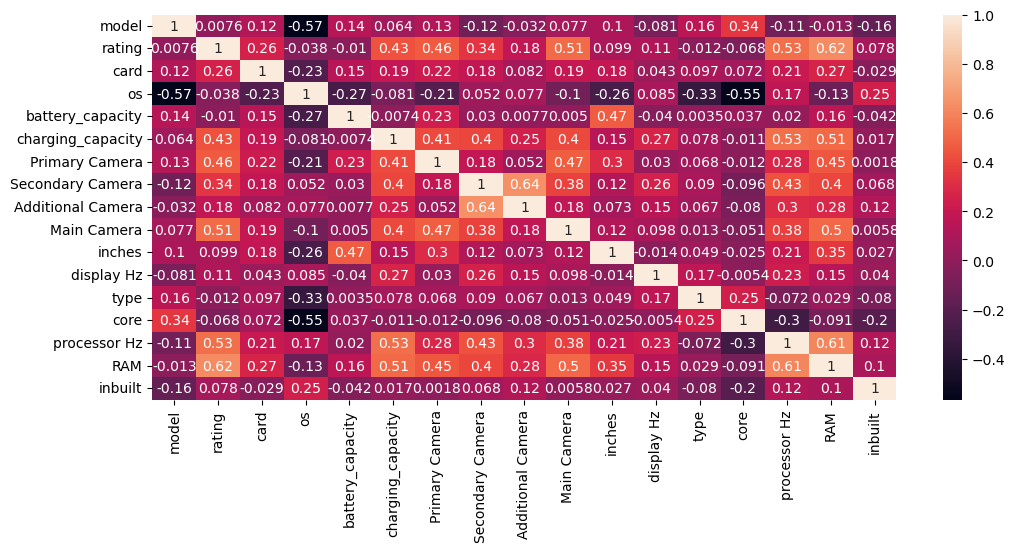

In [108]:
plt.figure(figsize=(12,5))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [110]:
model_price=df_copy.groupby(by="model")["rating"].mean().sort_values(ascending=False).reset_index()
px.bar(model_price,"model","rating",color="rating",title="Model vs Rating")
